# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [3]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender']=='Male']
#display(male_df)
female_df =  data[data['Gender']=='Female']
display(male_df.describe())
display(female_df.describe())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density for Height by Gender')

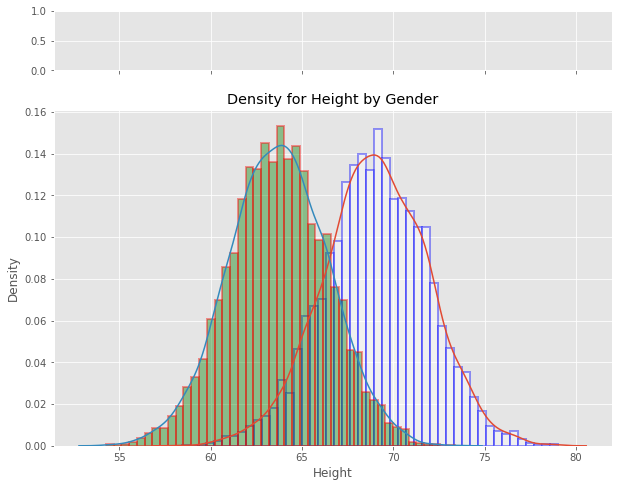

In [20]:
# Your code here
import seaborn as sns
import scipy.stats as stats

fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(male_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'blue',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             ax=ax2)

sns.distplot(female_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "g",
                                  "label": "Histogram",
                                  },
             ax=ax2)

ax2.set_title('Density for Height by Gender')


In [5]:
# Record your observations - are these inline with your personal observations?
#The height distributions for each gender are general normal distribution shapes, with the distribution for males
#lying generally above the females.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

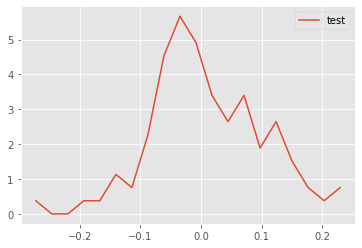

In [23]:
def density(x):
    
    n, bins = np.histogram(x, 20, density=1)
    #n , bins

    # Initialize numpy arrays according to number of bins with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

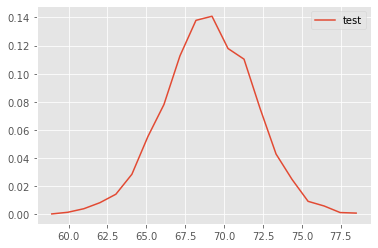

In [28]:
#testing
s = male_df.Height
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


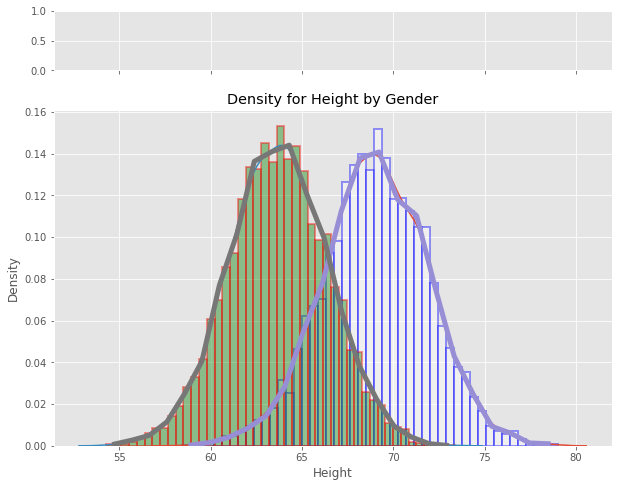

In [49]:
# Your code here 
#plt.plot(x, y);
###
# Your code here

fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(male_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'blue',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             ax=ax2)

sns.distplot(female_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "g",
                                  "label": "Histogram",
                                  },
             ax=ax2)

ax2.set_title('Density for Height by Gender')

xm,ym=density(male_df.Height)
xf,yf=density(female_df.Height)
ax2.plot(xm,ym, marker='', linewidth=5, alpha=1)
ax2.plot(xf,yf, marker='', linewidth=5, alpha=1)



## Repeat the above exercise for male and female weights

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


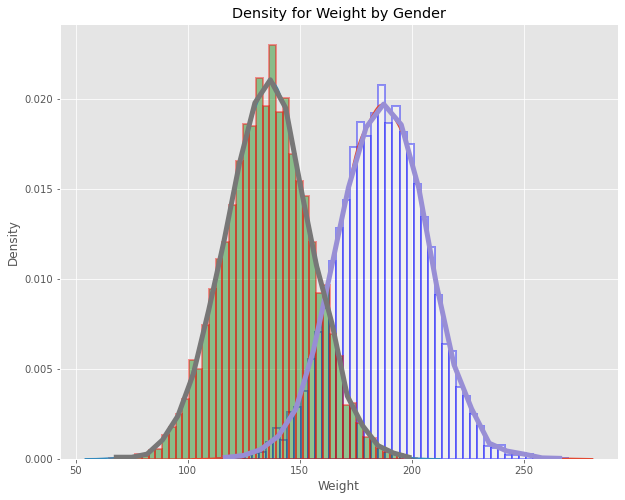

In [51]:
# Your code here 
fig, ax = plt.subplots(1, sharex=True, figsize = (10,8) )

sns.distplot(male_df.Weight, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'blue',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             ax=ax)

sns.distplot(female_df.Weight, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "g",
                                  "label": "Histogram",
                                  },
             ax=ax)

ax.set_title('Density for Weight by Gender')

xm,ym=density(male_df.Weight)
xf,yf=density(female_df.Weight)
ax.plot(xm,ym, marker='', linewidth=5, alpha=1)
ax.plot(xf,yf, marker='', linewidth=5, alpha=1)



## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
##The interpolations stick pretty closely to the density plots from above.  the histograms are a little "spiky"

# What is the takeaway when comparing male and female heights and weights?
##males weigh more like they are taller

## Repeat the above experiments in seaborn and compare with your results

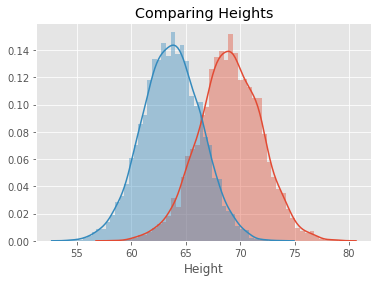

In [23]:
# Code for heights here

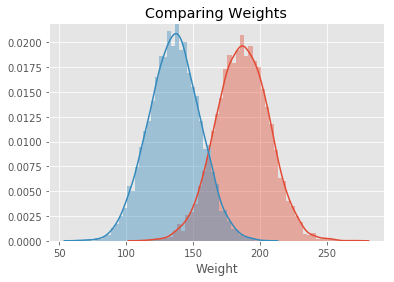

In [24]:
# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.